# **Lab - 1**

# **Task-1**

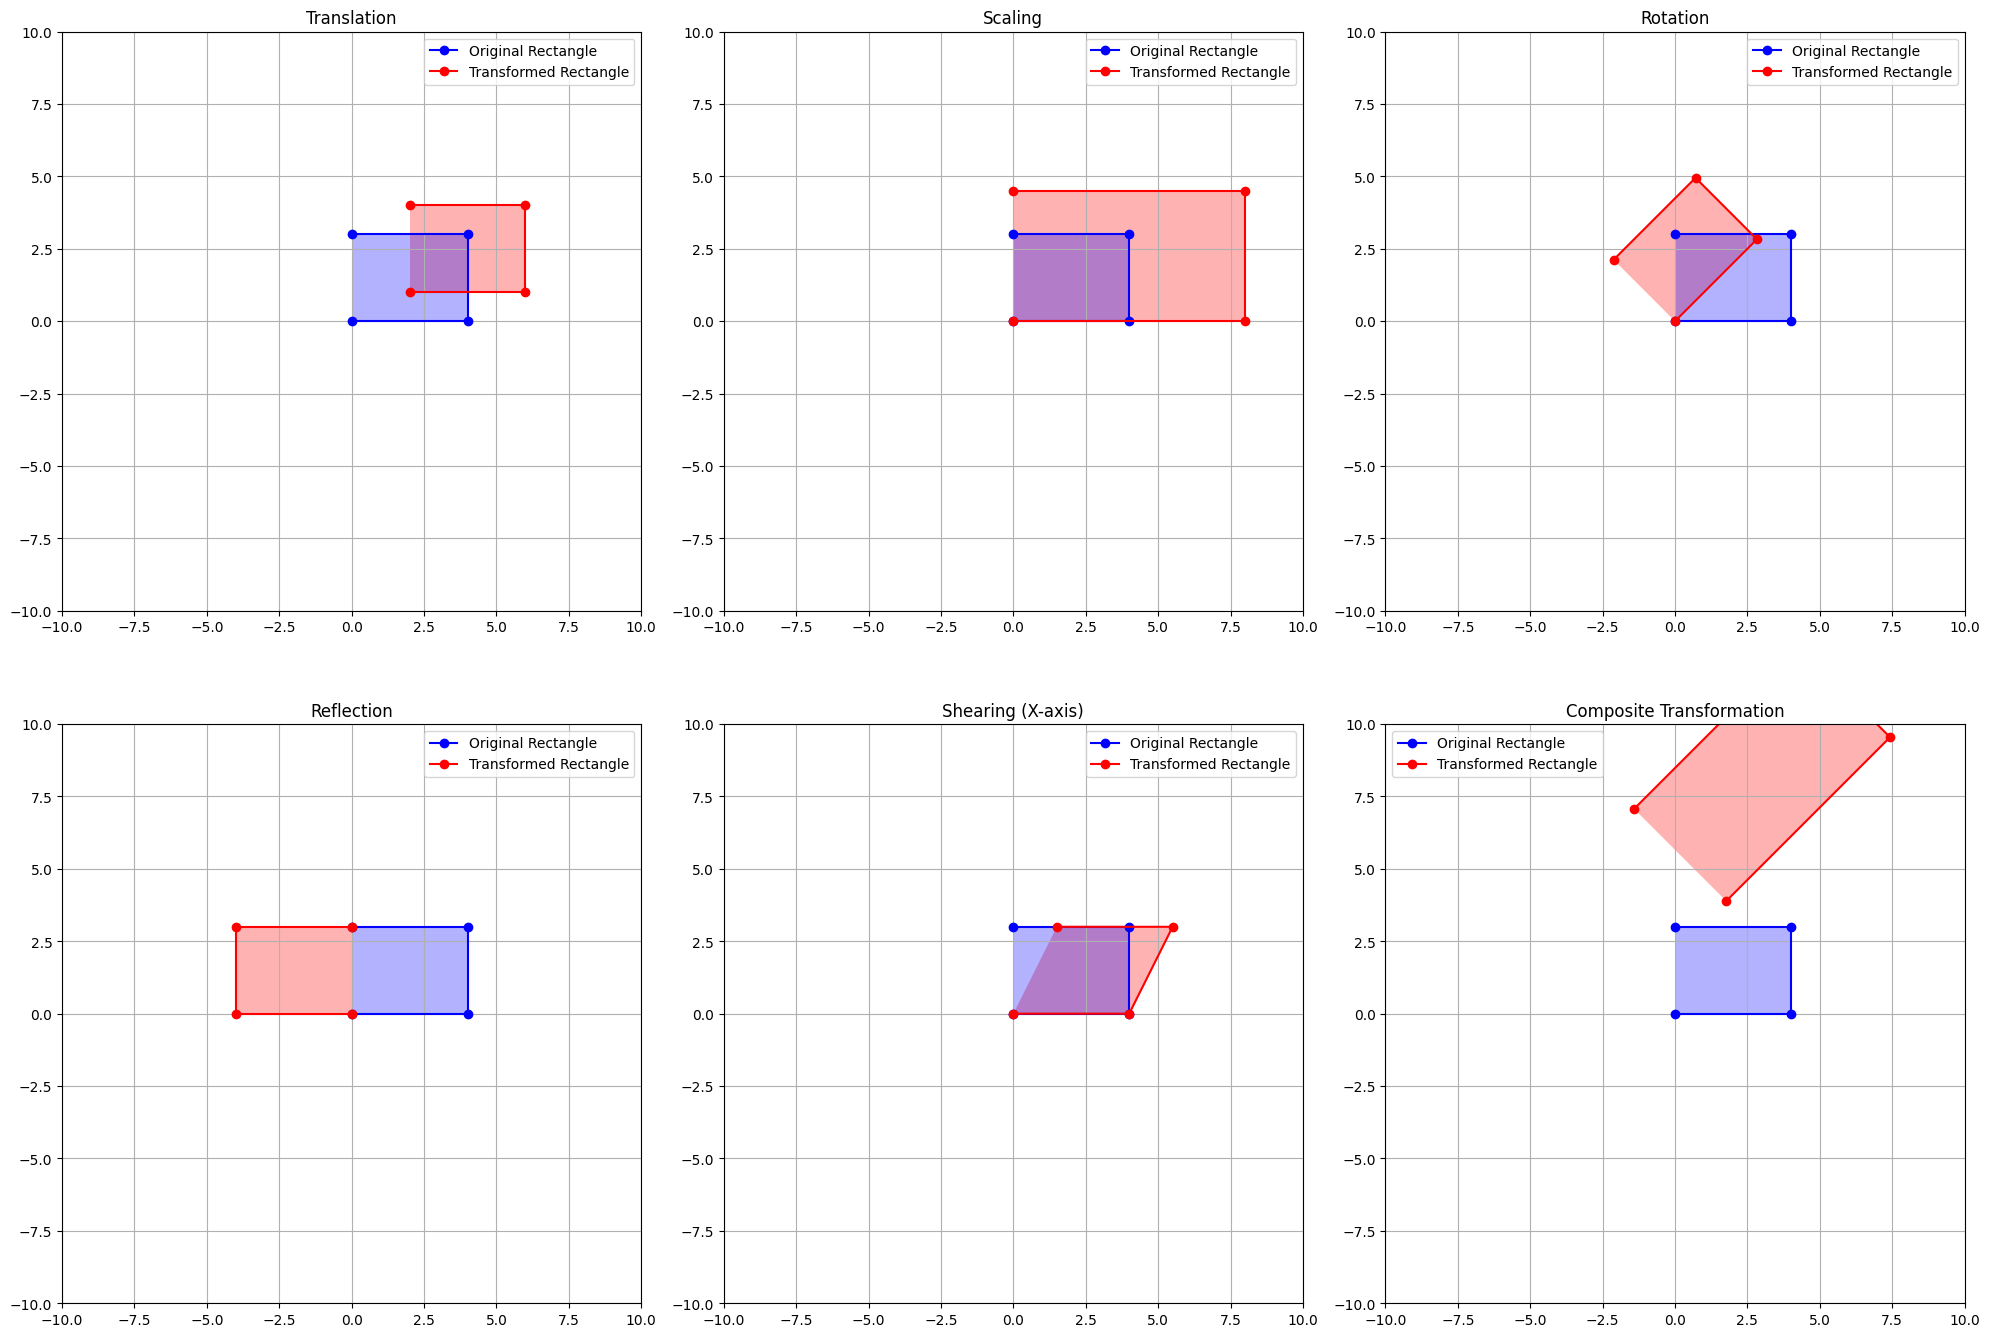

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the rectangle vertices
rectangle = np.array([[0, 0], [4, 0], [4, 3], [0, 3]])

# 1. Translation (tx=2, ty=1)
def translate(points, tx, ty):
    translation_matrix = np.array([[1, 0, tx],
                                   [0, 1, ty],
                                   [0, 0, 1]])
    points_homogeneous = np.hstack([points, np.ones((points.shape[0], 1))])
    translated_points = translation_matrix.dot(points_homogeneous.T).T
    return translated_points[:, :2]

# 2. Scaling (sx=2, sy=1.5)
def scale(points, sx, sy):
    scaling_matrix = np.array([[sx, 0],
                               [0, sy]])
    scaled_points = points.dot(scaling_matrix.T)
    return scaled_points

# 3. Rotation (45 degrees)
def rotate(points, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    rotation_matrix = np.array([[np.cos(angle_radians), -np.sin(angle_radians)],
                                [np.sin(angle_radians), np.cos(angle_radians)]])
    rotated_points = points.dot(rotation_matrix.T)
    return rotated_points

# 4. Reflection over y-axis
def reflect_y(points):
    reflection_matrix = np.array([[-1, 0],
                                  [0, 1]])
    reflected_points = points.dot(reflection_matrix.T)
    return reflected_points

# 5. Shearing in x-direction (sh_x = 0.5)
def shear_x(points, sh_x):
    shearing_matrix = np.array([[1, sh_x],
                                [0, 1]])
    sheared_points = points.dot(shearing_matrix.T)
    return sheared_points

# Combine transformations: Translation + Scaling + Rotation
def composite_transformation(points):
    # Translation by (tx=2, ty=1), Scaling by (sx=2, sy=1.5), Rotation by 45 degrees
    translated = translate(points, 2, 1)
    scaled = scale(translated, 2, 1.5)
    rotated = rotate(scaled, 45)
    return rotated

# Plotting function with horizontal arrangement
def plot_transformed_points(original, transformed, title, ax):
    ax.plot(original[:, 0], original[:, 1], 'bo-', label="Original Rectangle")
    ax.plot(transformed[:, 0], transformed[:, 1], 'ro-', label="Transformed Rectangle")
    ax.fill(transformed[:, 0], transformed[:, 1], 'r', alpha=0.3)
    ax.fill(original[:, 0], original[:, 1], 'b', alpha=0.3)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal', adjustable='box')
    ax.legend()
    ax.set_title(title)
    ax.grid(True)

# Apply all transformations and plot the results
original_rectangle = rectangle
translated_rect = translate(original_rectangle, 2, 1)
scaled_rect = scale(original_rectangle, 2, 1.5)
rotated_rect = rotate(original_rectangle, 45)
reflected_rect = reflect_y(original_rectangle)
sheared_rect = shear_x(original_rectangle, 0.5)
composite_rect = composite_transformation(original_rectangle)

# Create a single row of subplots (1 row, 6 columns)
fig, axes = plt.subplots(2, 3, figsize=(20, 14))

# Plot each transformation
plot_transformed_points(original_rectangle, translated_rect, 'Translation', axes[0,0])
plot_transformed_points(original_rectangle, scaled_rect, 'Scaling', axes[0,1])
plot_transformed_points(original_rectangle, rotated_rect, 'Rotation', axes[0,2])
plot_transformed_points(original_rectangle, reflected_rect, 'Reflection', axes[1,0])
plot_transformed_points(original_rectangle, sheared_rect, 'Shearing (X-axis)', axes[1,1])
plot_transformed_points(original_rectangle, composite_rect, 'Composite Transformation', axes[1,2])

# Show all the plots
plt.tight_layout()
plt.show()

# **Task-2**

**Image Translation**

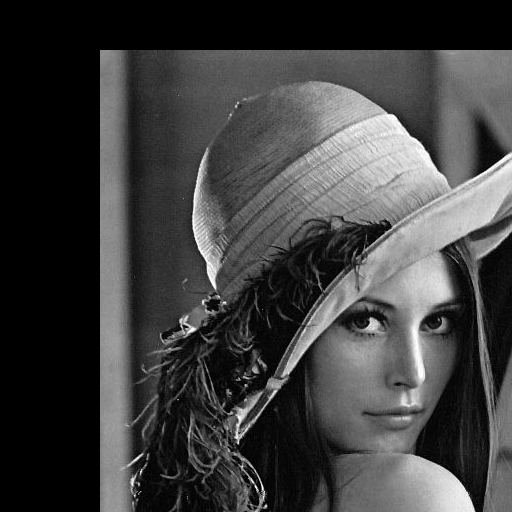

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('sample_data/Picture1.jpg')
rows, cols = image.shape[:2]
M = np.float32([[1, 0, 100], [0, 1, 50]])  # Translate 100px in x and 50px in y
translated_image = cv2.warpAffine(image, M, (cols, rows))

cv2_imshow(translated_image)

**Reflection**

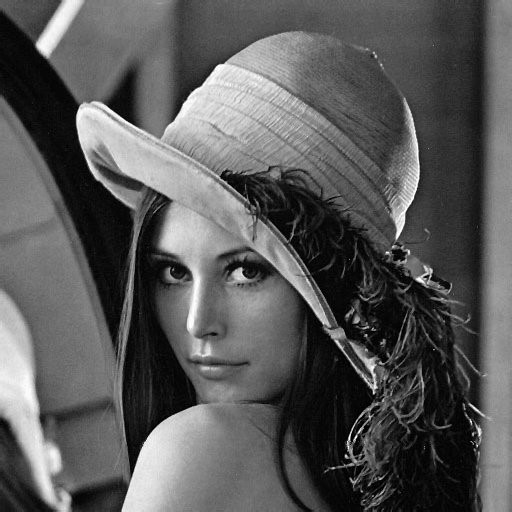

In [ ]:
reflected_image = cv2.flip(image, 1)  # Flip horizontally (y-axis reflection)
# cv2.flip(image, 0) for vertical reflection (x-axis)
cv2_imshow(reflected_image)
# cv2.waitKey(0)


**Rotation**

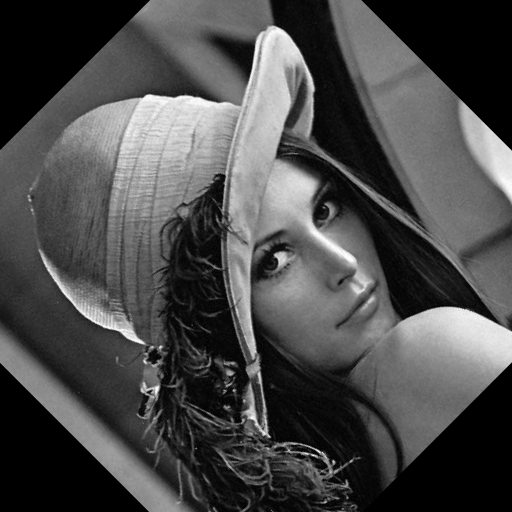

-1

In [ ]:
rows, cols = image.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)  # Rotate 45 degrees
rotated_image = cv2.warpAffine(image, M, (cols, rows))
cv2_imshow(rotated_image)
cv2.waitKey(0)


**Scaling**

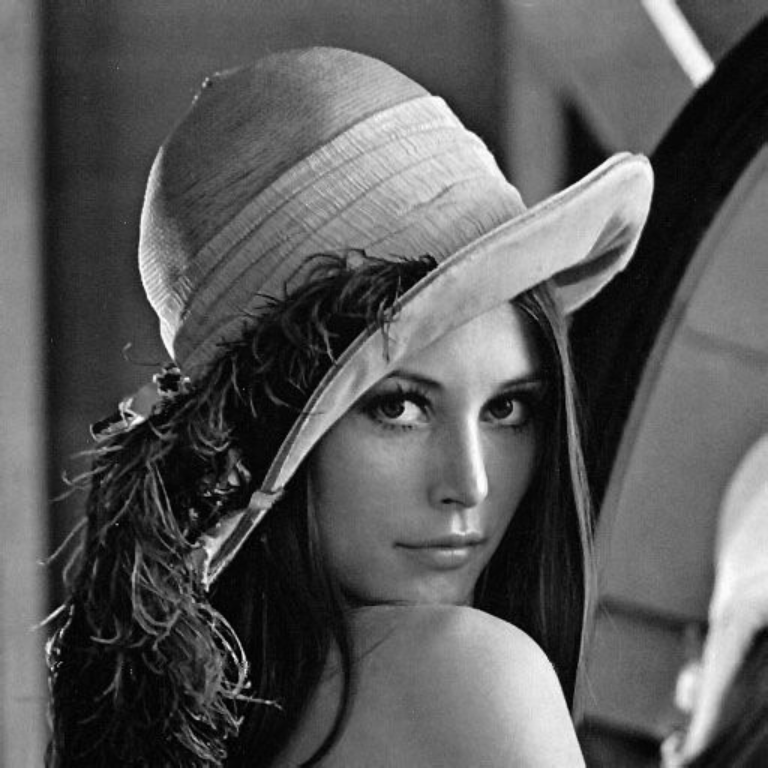

-1

In [ ]:
scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5)  # Scale by 1.5 in both directions
cv2_imshow(scaled_image)
cv2.waitKey(0)


**Cropping**

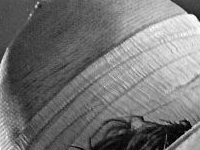

-1

In [ ]:
cropped_image = image[50:200, 100:300]  # Crop from row 50 to 200, column 100 to 300
cv2_imshow(cropped_image)
cv2.waitKey(0)


**Shearing in x-axis**

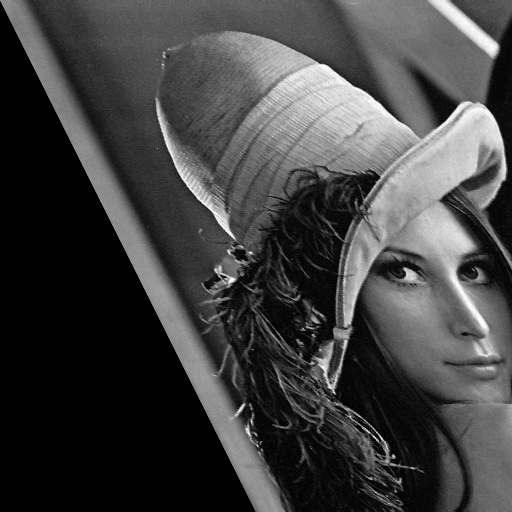

-1

In [ ]:
M = np.float32([[1, 0.5, 0], [0, 1, 0]])  # Shear in x-direction
sheared_image = cv2.warpAffine(image, M, (cols, rows))
cv2_imshow(sheared_image)
cv2.waitKey(0)


**Shearing in y-axis**

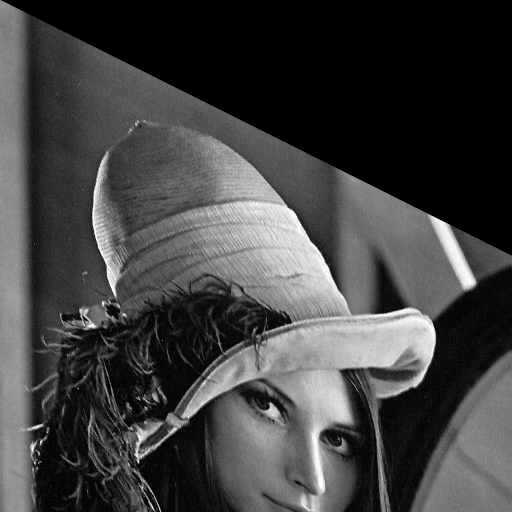

-1

In [ ]:
M = np.float32([[1, 0, 0], [0.5, 1, 0]])  # Shear in y-direction
sheared_image = cv2.warpAffine(image, M, (cols, rows))
cv2_imshow(sheared_image)
cv2.waitKey(0)
